In [37]:
import pandas as pd
import numpy as np
import geopandas
import seaborn as sns
from shapely.geometry import Point
import matplotlib.pyplot as plt
from geographiclib.geodesic import Geodesic
from geopy.geocoders import Nominatim
%matplotlib inline

In [38]:
#Read the input text file (Chicago Taxi Dataset)
df = pd.read_csv("trip_0.txt",sep=",",header = None)
df.drop(df.columns[0], axis=1,inplace=True)

In [39]:
df.columns = ['Latitude','Longitude','Time']
df.head()

,Latitude,Longitude,Time
0,41.869327,-87.666068,2011-04-09 20:04:56+03
1,41.869315,-87.666366,2011-04-09 20:05:04+03
2,41.869304,-87.666651,2011-04-09 20:05:07+03
3,41.869290,-87.666983,2011-04-09 20:05:10+03
4,41.869278,-87.667334,2011-04-09 20:05:13+03


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   125 non-null    float64
 1   Longitude  125 non-null    float64
 2   Time       125 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [41]:
#Getting the coordinates
df['coordinates'] = df[['Longitude','Latitude']].values.tolist()
df.head()

,Latitude,Longitude,Time,coordinates
0,41.869327,-87.666068,2011-04-09 20:04:56+03,"[-87.66606800000002, 41.869327]"
1,41.869315,-87.666366,2011-04-09 20:05:04+03,"[-87.666366, 41.869315]"
2,41.869304,-87.666651,2011-04-09 20:05:07+03,"[-87.666651, 41.869304]"
3,41.869290,-87.666983,2011-04-09 20:05:10+03,"[-87.666983, 41.86929]"
4,41.869278,-87.667334,2011-04-09 20:05:13+03,"[-87.667334, 41.869278]"


In [42]:
#In order to geo-plot need to have coordintes as a POINT datatype
df['coordinates_point'] = df['coordinates'].apply(Point)
df.head()

,Latitude,Longitude,Time,coordinates,coordinates_point
0,41.869327,-87.666068,2011-04-09 20:04:56+03,"[-87.66606800000002, 41.869327]",POINT (-87.66606800000002 41.869327)
1,41.869315,-87.666366,2011-04-09 20:05:04+03,"[-87.666366, 41.869315]",POINT (-87.666366 41.869315)
2,41.869304,-87.666651,2011-04-09 20:05:07+03,"[-87.666651, 41.869304]",POINT (-87.666651 41.869304)
3,41.869290,-87.666983,2011-04-09 20:05:10+03,"[-87.666983, 41.86929]",POINT (-87.666983 41.86929)
4,41.869278,-87.667334,2011-04-09 20:05:13+03,"[-87.667334, 41.869278]",POINT (-87.667334 41.869278)


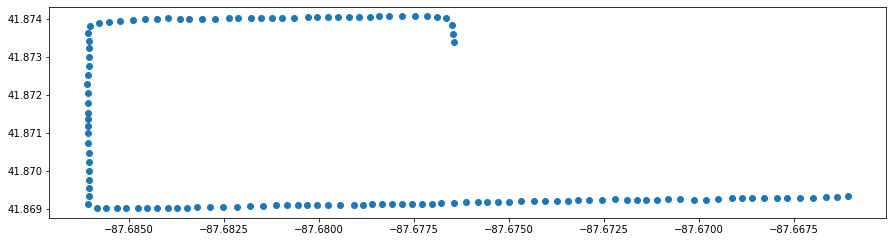

In [43]:
#Converting to geopandas
df_geo = geopandas.GeoDataFrame(df , geometry = 'coordinates_point')
df_geo.plot(figsize = (15,15))

In [44]:
#Function to calculate the direction between any two points
def calc_heading(lat1,long1,lat2,long2):
    geod = Geodesic.WGS84
    g = geod.Inverse(lat1, long1, lat2, long2)
    return g['azi1']

In [45]:
for i in range(0,df.shape[0]-1):
    df.loc[i,'heading'] = calc_heading(df.loc[i,'Latitude'] ,df.loc[i,'Longitude'],
                                       df.loc[i+1,'Latitude'],df.loc[i+1,'Longitude'])
df.head()

,Latitude,Longitude,Time,coordinates,coordinates_point,heading
0,41.869327,-87.666068,2011-04-09 20:04:56+03,"[-87.66606800000002, 41.869327]",POINT (-87.66607 41.86933),-93.083689
1,41.869315,-87.666366,2011-04-09 20:05:04+03,"[-87.666366, 41.869315]",POINT (-87.66637 41.86932),-92.955885
2,41.869304,-87.666651,2011-04-09 20:05:07+03,"[-87.666651, 41.869304]",POINT (-87.66665 41.86930),-93.228896
3,41.869290,-87.666983,2011-04-09 20:05:10+03,"[-87.666983, 41.86929]",POINT (-87.66698 41.86929),-92.618733
4,41.869278,-87.667334,2011-04-09 20:05:13+03,"[-87.667334, 41.869278]",POINT (-87.66733 41.86928),-89.786358


In [46]:
#The last Row will not have a value for heading, hence copying it with the same heading of the previous row
df.loc[df.shape[0]-1,'heading'] = df.loc[df.shape[0]-2,'heading']

In [49]:
#Need to convert the Time column to appropriate datatype
df['Time'] = pd.to_datetime(df['Time'], format='%Y/%m/%d %H:%M:%S')


In [50]:
#The first point is the start, hence it has covered 0 km
df.loc[0,'distance_km']=0
df.head()

,Latitude,Longitude,Time,coordinates,coordinates_point,heading,distance_km
0,41.869327,-87.666068,2011-04-09 20:04:56+03:00,"[-87.66606800000002, 41.869327]",POINT (-87.66607 41.86933),-93.083689,0.0
1,41.869315,-87.666366,2011-04-09 20:05:04+03:00,"[-87.666366, 41.869315]",POINT (-87.66637 41.86932),-92.955885,NaN
2,41.869304,-87.666651,2011-04-09 20:05:07+03:00,"[-87.666651, 41.869304]",POINT (-87.66665 41.86930),-93.228896,NaN
3,41.869290,-87.666983,2011-04-09 20:05:10+03:00,"[-87.666983, 41.86929]",POINT (-87.66698 41.86929),-92.618733,NaN
4,41.869278,-87.667334,2011-04-09 20:05:13+03:00,"[-87.667334, 41.869278]",POINT (-87.66733 41.86928),-89.786358,NaN


In [51]:
#Function to calculate the distance between any two points
def calc_distance(lat1,long1,lat2,long2):
    geod = Geodesic.WGS84
    g = geod.Inverse(lat1, long1, lat2, long2)
    return g['s12']/1000

In [52]:
for i in range(0,df.shape[0]-1):
    df.loc[i+1,'distance_km'] = calc_distance(df.loc[i+1,'Latitude'] ,df.loc[i+1,'Longitude'],
                                       df.loc[i,'Latitude'],df.loc[i,'Longitude'])
df.head()

,Latitude,Longitude,Time,coordinates,coordinates_point,heading,distance_km
0,41.869327,-87.666068,2011-04-09 20:04:56+03:00,"[-87.66606800000002, 41.869327]",POINT (-87.66607 41.86933),-93.083689,0.000000
1,41.869315,-87.666366,2011-04-09 20:05:04+03:00,"[-87.666366, 41.869315]",POINT (-87.66637 41.86932),-92.955885,0.024776
2,41.869304,-87.666651,2011-04-09 20:05:07+03:00,"[-87.666651, 41.869304]",POINT (-87.66665 41.86930),-93.228896,0.023692
3,41.869290,-87.666983,2011-04-09 20:05:10+03:00,"[-87.666983, 41.86929]",POINT (-87.66698 41.86929),-92.618733,0.027606
4,41.869278,-87.667334,2011-04-09 20:05:13+03:00,"[-87.667334, 41.869278]",POINT (-87.66733 41.86928),-89.786358,0.029171


In [53]:
#The first point is assumed to have 0 km/h speed
df.loc[0,'velocity_kmh'] = 0
df.head()

,Latitude,Longitude,Time,coordinates,coordinates_point,heading,distance_km,velocity_kmh
0,41.869327,-87.666068,2011-04-09 20:04:56+03:00,"[-87.66606800000002, 41.869327]",POINT (-87.66607 41.86933),-93.083689,0.000000,0.0
1,41.869315,-87.666366,2011-04-09 20:05:04+03:00,"[-87.666366, 41.869315]",POINT (-87.66637 41.86932),-92.955885,0.024776,NaN
2,41.869304,-87.666651,2011-04-09 20:05:07+03:00,"[-87.666651, 41.869304]",POINT (-87.66665 41.86930),-93.228896,0.023692,NaN
3,41.869290,-87.666983,2011-04-09 20:05:10+03:00,"[-87.666983, 41.86929]",POINT (-87.66698 41.86929),-92.618733,0.027606,NaN
4,41.869278,-87.667334,2011-04-09 20:05:13+03:00,"[-87.667334, 41.869278]",POINT (-87.66733 41.86928),-89.786358,0.029171,NaN


In [54]:
#Function to calculate the speed at every point in km/h
def calc_velocity(dist_km, time_start, time_end):
    if time_end > time_start:
        return (dist_km / (((time_end - time_start).seconds)/3600))
    else: 
        return 0

In [55]:
for i in range(1,df.shape[0]):
    df.loc[i,'velocity_kmh'] = calc_velocity(df.loc[i,'distance_km'] ,df.loc[i-1,'Time'],
                                       df.loc[i,'Time'])
df.head()

,Latitude,Longitude,Time,coordinates,coordinates_point,heading,distance_km,velocity_kmh
0,41.869327,-87.666068,2011-04-09 20:04:56+03:00,"[-87.66606800000002, 41.869327]",POINT (-87.66607 41.86933),-93.083689,0.000000,0.000000
1,41.869315,-87.666366,2011-04-09 20:05:04+03:00,"[-87.666366, 41.869315]",POINT (-87.66637 41.86932),-92.955885,0.024776,11.149134
2,41.869304,-87.666651,2011-04-09 20:05:07+03:00,"[-87.666651, 41.869304]",POINT (-87.66665 41.86930),-93.228896,0.023692,28.430693
3,41.869290,-87.666983,2011-04-09 20:05:10+03:00,"[-87.666983, 41.86929]",POINT (-87.66698 41.86929),-92.618733,0.027606,33.127798
4,41.869278,-87.667334,2011-04-09 20:05:13+03:00,"[-87.667334, 41.869278]",POINT (-87.66733 41.86928),-89.786358,0.029171,35.004628


In [56]:
#Finding all neighbours for a point within a radius of 0.0008 km
from scipy import spatial
pts = list(df['coordinates'])
kdtree = spatial.KDTree(pts)
neigh_list = []

# We cycle on every point and calculate its neighbours with the function query_ball_point
for i in pts[ : :1]:
    neigh_list.append(kdtree.query_ball_point(i, r=0.003))
#print((neigh_list))

In [57]:
#To calculate the mean_heading and oneway attribute at every GPS point 
def calc_mean_heading(i,neigh):
    similar_sum = 0
    opposite_sum = 0
    similar_count = 0
    opposite_count = 0
    for j in neigh:
        if abs(df.loc[i,'heading'] - df.loc[j,'heading']) < 20:
            similar_count = similar_count + 1
            similar_sum = similar_sum + df.loc[j,'heading']
        elif (abs(df.loc[i,'heading'] - df.loc[j,'heading'])>=160) & (abs(df.loc[i,'heading'] - df.loc[j,'heading'])<=200):
            opposite_count = opposite_count + 1
            opposite_sum = opposite_sum + df.loc[j,'heading']
        else:
            continue;
    if(similar_count+opposite_count)>0:
        if similar_count / (similar_count+opposite_count) > 0.9:
            df.loc[i,'oneway'] = 'yes'
            df.loc[i,'mean_similar_heading'] = similar_sum/similar_count
        elif opposite_count / (similar_count+opposite_count) > 0.9:
            df.loc[i,'oneway'] = '-1'
            df.loc[i,'mean_opp_heading'] = opposite_sum/opposite_count 
        else:
            df.loc[i,'oneway'] = 'no'
            df.loc[i,'mean_similar_heading'] = similar_sum/similar_count
            df.loc[i,'mean_opp_heading'] = opposite_sum/opposite_count


for i in range(len(neigh_list)):
    calc_mean_heading(i,neigh_list[i])
df.head()

,Latitude,Longitude,Time,coordinates,coordinates_point,heading,distance_km,velocity_kmh,oneway,mean_similar_heading
0,41.869327,-87.666068,2011-04-09 20:04:56+03:00,"[-87.66606800000002, 41.869327]",POINT (-87.66607 41.86933),-93.083689,0.000000,0.000000,yes,-91.461593
1,41.869315,-87.666366,2011-04-09 20:05:04+03:00,"[-87.666366, 41.869315]",POINT (-87.66637 41.86932),-92.955885,0.024776,11.149134,yes,-91.662744
2,41.869304,-87.666651,2011-04-09 20:05:07+03:00,"[-87.666651, 41.869304]",POINT (-87.66665 41.86930),-93.228896,0.023692,28.430693,yes,-91.854410
3,41.869290,-87.666983,2011-04-09 20:05:10+03:00,"[-87.666983, 41.86929]",POINT (-87.66698 41.86929),-92.618733,0.027606,33.127798,yes,-91.747382
4,41.869278,-87.667334,2011-04-09 20:05:13+03:00,"[-87.667334, 41.869278]",POINT (-87.66733 41.86928),-89.786358,0.029171,35.004628,yes,-91.452040


In [58]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df

,Latitude,Longitude,Time,coordinates,coordinates_point,heading,distance_km,velocity_kmh,oneway,mean_similar_heading
0,41.869327,-87.666068,2011-04-09 20:04:56+03:00,"[-87.66606800000002, 41.869327]",POINT (-87.66607 41.86933),-93.083689,0.000000,0.000000,yes,-91.461593
1,41.869315,-87.666366,2011-04-09 20:05:04+03:00,"[-87.666366, 41.869315]",POINT (-87.66637 41.86932),-92.955885,0.024776,11.149134,yes,-91.662744
2,41.869304,-87.666651,2011-04-09 20:05:07+03:00,"[-87.666651, 41.869304]",POINT (-87.66665 41.86930),-93.228896,0.023692,28.430693,yes,-91.854410
3,41.869290,-87.666983,2011-04-09 20:05:10+03:00,"[-87.666983, 41.86929]",POINT (-87.66698 41.86929),-92.618733,0.027606,33.127798,yes,-91.747382
4,41.869278,-87.667334,2011-04-09 20:05:13+03:00,"[-87.667334, 41.869278]",POINT (-87.66733 41.86928),-89.786358,0.029171,35.004628,yes,-91.452040
5,41.869279,-87.667693,2011-04-09 20:05:16+03:00,"[-87.667693, 41.869279]",POINT (-87.66769 41.86928),-91.256352,0.029804,35.765313,yes,-91.402988
6,41.869275,-87.667937,2011-04-09 20:05:18+03:00,"[-87.667937, 41.869275]",POINT (-87.66794 41.86928),-90.439157,0.020262,36.471203,yes,-91.382293
7,41.869273,-87.668286,2011-04-09 20:05:21+03:00,"[-87.668286, 41.869273]",POINT (-87.66829 41.86927),-89.750209,0.028975,34.769848,yes,-91.508580
8,41.869274,-87.668593,2011-04-09 20:05:24+03:00,"[-87.668593, 41.869274]",POINT (-87.66859 41.86927),-89.999909,0.025487,30.584902,yes,-91.286361
9,41.869274,-87.668866,2011-04-09 20:05:30+03:00,"[-87.66886600000002, 41.869274]",POINT (-87.66887 41.86927),-91.496737,0.022664,13.598695,yes,-91.218654


In [59]:
#Function to map the GPS point to its road
def map_matching(row):
    geolocator = Nominatim()
    location = geolocator.reverse(str(row['Latitude'])+','+str(row['Longitude']),timeout=10000)
    #print(location.raw)
    return location.raw['address']['road'].lower() 

In [60]:
df['road'] = df.apply(map_matching,axis=1)

<ipython-input-59-d648d46fe9df>:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  geolocator = Nominatim()


In [63]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df

,Latitude,Longitude,Time,coordinates,coordinates_point,heading,distance_km,velocity_kmh,oneway,mean_similar_heading,road
0,41.869327,-87.666068,2011-04-09 20:04:56+03:00,"[-87.66606800000002, 41.869327]",POINT (-87.66607 41.86933),-93.083689,0.000000,0.000000,yes,-91.461593,west taylor street
1,41.869315,-87.666366,2011-04-09 20:05:04+03:00,"[-87.666366, 41.869315]",POINT (-87.66637 41.86932),-92.955885,0.024776,11.149134,yes,-91.662744,south ashland avenue
2,41.869304,-87.666651,2011-04-09 20:05:07+03:00,"[-87.666651, 41.869304]",POINT (-87.66665 41.86930),-93.228896,0.023692,28.430693,yes,-91.854410,west taylor street
3,41.869290,-87.666983,2011-04-09 20:05:10+03:00,"[-87.666983, 41.86929]",POINT (-87.66698 41.86929),-92.618733,0.027606,33.127798,yes,-91.747382,west taylor street
4,41.869278,-87.667334,2011-04-09 20:05:13+03:00,"[-87.667334, 41.869278]",POINT (-87.66733 41.86928),-89.786358,0.029171,35.004628,yes,-91.452040,west taylor street
5,41.869279,-87.667693,2011-04-09 20:05:16+03:00,"[-87.667693, 41.869279]",POINT (-87.66769 41.86928),-91.256352,0.029804,35.765313,yes,-91.402988,west grenshaw street
6,41.869275,-87.667937,2011-04-09 20:05:18+03:00,"[-87.667937, 41.869275]",POINT (-87.66794 41.86928),-90.439157,0.020262,36.471203,yes,-91.382293,west grenshaw street
7,41.869273,-87.668286,2011-04-09 20:05:21+03:00,"[-87.668286, 41.869273]",POINT (-87.66829 41.86927),-89.750209,0.028975,34.769848,yes,-91.508580,west grenshaw street
8,41.869274,-87.668593,2011-04-09 20:05:24+03:00,"[-87.668593, 41.869274]",POINT (-87.66859 41.86927),-89.999909,0.025487,30.584902,yes,-91.286361,west grenshaw street
9,41.869274,-87.668866,2011-04-09 20:05:30+03:00,"[-87.66886600000002, 41.869274]",POINT (-87.66887 41.86927),-91.496737,0.022664,13.598695,yes,-91.218654,west grenshaw street


In [65]:
#Grouping the points road-wise to check the oneway attribute value for all the points belonging to that road
grouped_df = df.groupby(['road'])['oneway']
for key, item in grouped_df:
    print("ROAD NAME:",key)
    print(grouped_df.get_group(key), "\n\n")


ROAD NAME: south ashland avenue
1    yes
Name: oneway, dtype: object 


ROAD NAME: south damen avenue
122    yes
123    yes
124    yes
Name: oneway, dtype: object 


ROAD NAME: south hoyne avenue
113    yes
Name: oneway, dtype: object 


ROAD NAME: south western avenue
68    yes
69    yes
70    yes
71    yes
72    yes
73    yes
74    yes
75    yes
76    yes
77    yes
79    yes
80    yes
81    yes
82    yes
83    yes
84    yes
86    yes
87    yes
88    yes
Name: oneway, dtype: object 


ROAD NAME: west flournoy street
85    yes
Name: oneway, dtype: object 


ROAD NAME: west grenshaw street
5     yes
6     yes
7     yes
8     yes
9     yes
10    yes
11    yes
12    yes
13    yes
14    yes
15    yes
16    yes
17    yes
18    yes
19    yes
20    yes
21    yes
22    yes
23    yes
24    yes
25    yes
26    yes
27    yes
28    yes
29    yes
30    yes
31    yes
32    yes
Name: oneway, dtype: object 


ROAD NAME: west harrison street
89     yes
90     yes
91     yes
92     yes
93     yes
94    

In [66]:
road_names = df['road'].unique()
for road_name in road_names:
    df.loc[df['road']==road_name,'road_heading'] = df.loc[df['road']==road_name]['heading'].mean()

In [67]:
df

,Latitude,Longitude,Time,coordinates,coordinates_point,heading,distance_km,velocity_kmh,oneway,mean_similar_heading,road,road_heading
0,41.869327,-87.666068,2011-04-09 20:04:56+03:00,"[-87.66606800000002, 41.869327]",POINT (-87.66607 41.86933),-93.083689,0.000000,0.000000,yes,-91.461593,west taylor street,-90.366540
1,41.869315,-87.666366,2011-04-09 20:05:04+03:00,"[-87.666366, 41.869315]",POINT (-87.66637 41.86932),-92.955885,0.024776,11.149134,yes,-91.662744,south ashland avenue,-92.955885
2,41.869304,-87.666651,2011-04-09 20:05:07+03:00,"[-87.666651, 41.869304]",POINT (-87.66665 41.86930),-93.228896,0.023692,28.430693,yes,-91.854410,west taylor street,-90.366540
3,41.869290,-87.666983,2011-04-09 20:05:10+03:00,"[-87.666983, 41.86929]",POINT (-87.66698 41.86929),-92.618733,0.027606,33.127798,yes,-91.747382,west taylor street,-90.366540
4,41.869278,-87.667334,2011-04-09 20:05:13+03:00,"[-87.667334, 41.869278]",POINT (-87.66733 41.86928),-89.786358,0.029171,35.004628,yes,-91.452040,west taylor street,-90.366540
5,41.869279,-87.667693,2011-04-09 20:05:16+03:00,"[-87.667693, 41.869279]",POINT (-87.66769 41.86928),-91.256352,0.029804,35.765313,yes,-91.402988,west grenshaw street,-91.057206
6,41.869275,-87.667937,2011-04-09 20:05:18+03:00,"[-87.667937, 41.869275]",POINT (-87.66794 41.86928),-90.439157,0.020262,36.471203,yes,-91.382293,west grenshaw street,-91.057206
7,41.869273,-87.668286,2011-04-09 20:05:21+03:00,"[-87.668286, 41.869273]",POINT (-87.66829 41.86927),-89.750209,0.028975,34.769848,yes,-91.508580,west grenshaw street,-91.057206
8,41.869274,-87.668593,2011-04-09 20:05:24+03:00,"[-87.668593, 41.869274]",POINT (-87.66859 41.86927),-89.999909,0.025487,30.584902,yes,-91.286361,west grenshaw street,-91.057206
9,41.869274,-87.668866,2011-04-09 20:05:30+03:00,"[-87.66886600000002, 41.869274]",POINT (-87.66887 41.86927),-91.496737,0.022664,13.598695,yes,-91.218654,west grenshaw street,-91.057206


### Areas for improvement
Oneway attribute is independent of Map matching, however the algorithm depends on the width of the road to have accurate results  
Other road attributes still require Map matching  